In [7]:
import sys
!conda install --yes xarray dask netCDF4 bottleneck

Solving environment: done

## Package Plan ##

  environment location: /Users/brigidlynch/anaconda3

  added / updated specs: 
    - bottleneck
    - dask
    - netcdf4
    - xarray


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libnetcdf-4.6.1            |       h4e6abe9_2         1.2 MB
    cftime-1.0.3.4             |   py37h1d22016_0         251 KB
    conda-4.6.2                |           py37_0         1.6 MB
    netcdf4-1.4.2              |   py37h08833f9_0         437 KB
    hdf4-4.2.13                |       h39711bb_2         874 KB
    xarray-0.11.0              |           py37_0         805 KB
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

    cftime:    1.0.3.4-py37h1d22016_0
    hdf4:      4.2.13-h39711bb_2     
    libnetcdf: 4.6.1-h4e6abe

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


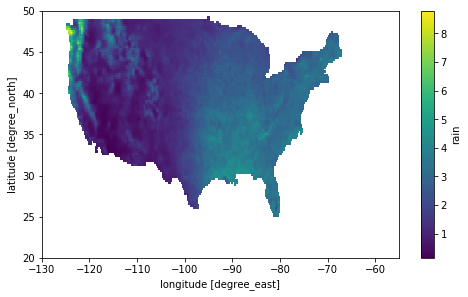

In [8]:
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

URL = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.CONUS/.v1p0/.REALTIME/.rain/T/monthlyAverage/dods'
ds = xr.open_dataset(URL,decode_times=False)
ds

plt.figure(figsize=(8, 10))
plt.subplot(211)
ds.rain.mean(dim='T').plot()

In [9]:
ds

<xarray.Dataset>
Dimensions:  (T: 144, X: 300, Y: 120)
Coordinates:
  * X        (X) float32 -129.875 -129.625 -129.375 ... -55.625 -55.375 -55.125
  * T        (T) float32 564.5 565.5 566.5 567.5 ... 704.5 705.5 706.5 707.5
  * Y        (Y) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
Data variables:
    rain     (T, Y, X) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  IRIDL

In [13]:
type(ds)


xarray.core.dataset.Dataset

In [15]:
xr.decode_cf(ds,decode_times=False)

<xarray.Dataset>
Dimensions:  (T: 144, X: 300, Y: 120)
Coordinates:
  * X        (X) float32 -129.875 -129.625 -129.375 ... -55.625 -55.375 -55.125
  * T        (T) float32 564.5 565.5 566.5 567.5 ... 704.5 705.5 706.5 707.5
  * Y        (Y) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
Data variables:
    rain     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

Look at relationship between time and space explored: 

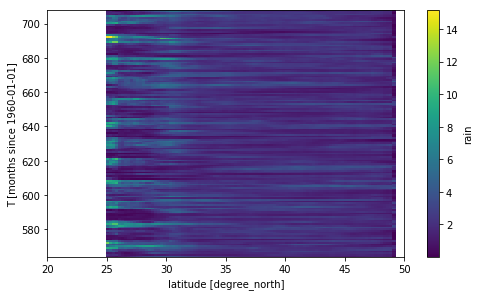

In [19]:
plt.figure(figsize=(8, 10))
plt.subplot(211)
ds.rain.mean(dim='X').plot()

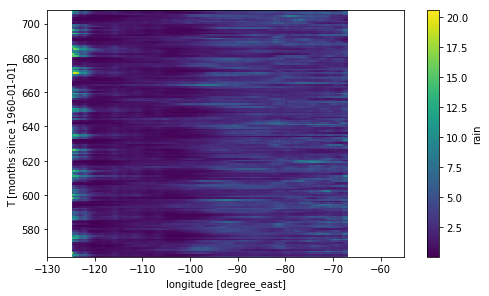

In [20]:
plt.figure(figsize=(8, 10))
plt.subplot(211)
ds.rain.mean(dim='Y').plot()

Look at rain vs time at a specific latitude and longitude: 

In [39]:
preciptime=ds.isel(X=100,Y=100)

In [40]:
preciptime


<xarray.Dataset>
Dimensions:  (T: 144)
Coordinates:
    X        float32 -104.875
  * T        (T) float32 564.5 565.5 566.5 567.5 ... 704.5 705.5 706.5 707.5
    Y        float32 45.125
Data variables:
    rain     (T) float32 0.064689994 0.80735445 ... 0.6716093 0.9241616
Attributes:
    Conventions:  IRIDL

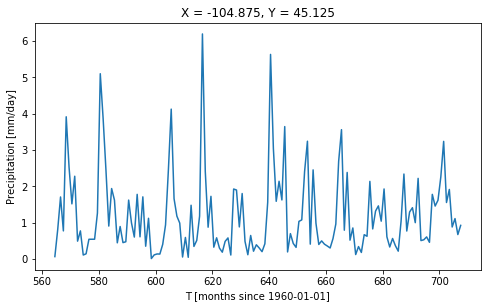

In [41]:
plt.figure(figsize=(8, 10))
plt.subplot(211)
preciptime.rain.plot()